# 宿題1

In [448]:
%matplotlib inline
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import gaussian_kde
font = {"family": "DejaVu Sans"}
matplotlib.rc('font', **font)

In [449]:
def setup():
    np.random.seed(100)
    x = np.zeros(1000)
    u = np.random.rand(1000)

    flag = (u >= 0) & (u < 1/8)
    x[flag] = np.sqrt(8 * u[flag])
    flag = (u >= 1/8) & (u < 1/4)
    x[flag] = 2 - np.sqrt(2 - 8 * u[flag])
    flag = (u >= 1/4) & (u < 1/2)
    x[flag] = 1 + 4  * u[flag]
    flag = (u >= 1/2) &  (u < 3/4)
    x[flag] = 3 + np.sqrt(4 * u[flag] - 2)
    flag = (u >= 3/4) & (u <= 1)
    x[flag] = 5 - np.sqrt(4 - 4 * u[flag])
    
    return x

In [450]:
def likelihood_cross_validation(x, band_width):
    import copy
    split_num = 5
    lcv_all = []
    for j in range(split_num):
        start, end = int(len(x) / split_num * (j)), int(len(x) / split_num * (j + 1) - 1)
        
        x_temp = np.delete(copy.deepcopy(x), range(start, end))
        kde = gaussian_kde(x_temp)
        kde.set_bandwidth(band_width)
        
        t_j = x[start:end]
        lcv_j = 1 / len(t_j) * np.sum(np.log(kde(t_j)))
        lcv_all.append(lcv_j)
    
    return np.sum(lcv_all) / split_num

In [451]:
def plot_graph(x, band_width):
    fig, (axL, axR) = plt.subplots(ncols = 2, figsize=(12, 4))
    axL.hist(x, bins=20, histtype='bar')

    kde = gaussian_kde(x)
    kde.set_bandwidth(band_width)
    y= kde(np.linspace(0, 5, 50))
    x_kde = np.linspace(0, 5, 50)
    axR.plot(x_kde, y)

## 尤度交差検証によるバンド幅の決定
尤度交差確認を, バンド幅0.01~1.00の範囲で行う.  
結果は, 0.04が対数尤度を最大にするということがわかる.

the best band width: 0.04


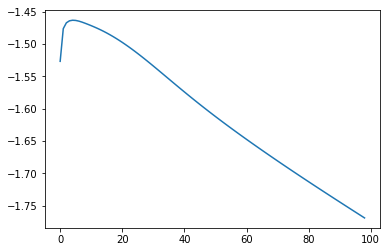

In [452]:
x = setup()
result = np.array([likelihood_cross_validation(x, i / 100) for i in range(1, 100)])
plt.plot(result)    
best_band_width = np.where(result == np.array(result).max())[0][0] / 100
print(f'the best band width: {best_band_width}')

## 結果の描画
xの分布図と, もっとも良いバンド幅を指定したカーネル密度推定の結果図

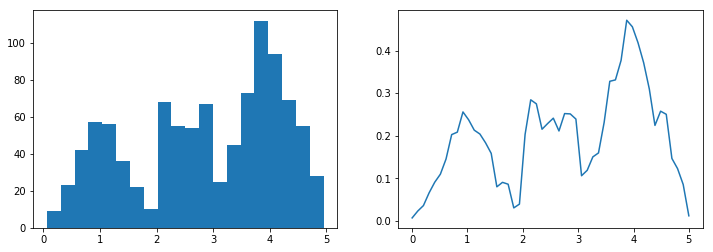

In [453]:
plot_graph(x, best_band_width)